## Introduction 

   Companies carryout marketing through several means for different reasons: to create more awareness  about their products and services, increase sales, get new customers, and also to be top of mind for their current customers and intending customers.

A marketing campaign is successful when the objective of the marketing is accomplished. To achieve this, a company must first understand their customers, so they can market apporpriately speaking the right language, and this all boils down to analyzing their historical data to understand their customers.

In this Project,I am a Data Analyst Consulting for a small business company to help them understand their ideal customers using their historical data from previous marketing campaigns.


### Problem Statement

In this project I take the position of a Marketign Data Analyst Consulting for a small business who sells retail products such as wines,Fruits, Fish products, sweet products, and Gold products. 

I have been provided with historical data of their past campaign, to analyze and help them better understand who their ideal customers are.

 

In [2]:
#Improting the needed the needed libraries
import pandas as pd
import numpy as np
import os
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


import sys
!conda install --yes --prefix {sys.prefix} missingno

import missingno as msno


Solving environment: ...working... done

# All requested packages already installed.



In [3]:
# Load the csv file
marketing = pd.read_csv(r"C:\Users\AKHIGBE\Downloads\Company's Ideal Customers Marketing Strategy\marketing_campaign Project.csv")

### Data Preprocessing



In [4]:
#Viewing the first rows of data 

marketing.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,41156,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,41706,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,41507,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,41680,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,41658,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
# Checking the columns
marketing.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [6]:
#Viewing the datatypes are properly represented in each columns and also checking  for missing data

marketing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   int64  
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
marketing

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,41156,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,41706,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,41507,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,41680,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,41658,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,41438,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,41800,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,41664,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,41663,8,428,...,3,0,0,0,0,0,0,3,11,0


In [8]:
#There are some missing values in the income column, we will need to input "Nan" or "0" in the cell

# we will use the current date and time to determine the customers age by minusing the current year by their year of birth to better understand their Age


marketing['Age']=datetime.now().year - marketing['Year_Birth']
marketing.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,41156,58,635,...,0,0,0,0,0,0,3,11,1,66
1,2174,1954,Graduation,Single,46344.0,1,1,41706,38,11,...,0,0,0,0,0,0,3,11,0,69
2,4141,1965,Graduation,Together,71613.0,0,0,41507,26,426,...,0,0,0,0,0,0,3,11,0,58
3,6182,1984,Graduation,Together,26646.0,1,0,41680,26,11,...,0,0,0,0,0,0,3,11,0,39
4,5324,1981,PhD,Married,58293.0,1,0,41658,94,173,...,0,0,0,0,0,0,3,11,0,42


In [9]:
# For better understanding we will convert the Dt_customer to Tenure using our current date and time to ensure we better understand how long the customer has been with us


marketing['now']=datetime.now()
marketing['Tenure'] = marketing['now'] - (marketing['Dt_Customer']) * pd.offsets.Day()


C:\Users\AKHIGBE\anaconda4\lib\site-packages\pandas\core\arrays\datetimelike.py:1189: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized.
  warnings.warn(


In [10]:
marketing['quotient'] = marketing['Dt_Customer'] - marketing['now']
marketing['quotient'] = marketing['quotient'].dt.days

TypeError: cannot subtract DatetimeArray from ndarray

In [12]:
import pandas as pd

# Create two DatetimeArray
dates1 = pd.date_range(start='2022-01-01', end='2022-01-05')
dates2 = pd.date_range(start='2022-01-02', end='2022-01-06')

# Subtract 
result = dates1 - dates2

print(result)


TimedeltaIndex(['-1 days', '-1 days', '-1 days', '-1 days', '-1 days'], dtype='timedelta64[ns]', freq=None)


In [13]:
marketing.describe(include='all')



C:\Users\AKHIGBE\AppData\Local\Temp\ipykernel_2892\1063299.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  marketing.describe(include='all')
C:\Users\AKHIGBE\AppData\Local\Temp\ipykernel_2892\1063299.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  marketing.describe(include='all')


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,now,Tenure
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240,2240
unique,NaN,NaN,5,8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,663
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-21 11:26:05.881132,1910-05-22 11:26:05.881132
freq,NaN,NaN,1127,864,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2240,12
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-21 11:26:05.881132,1908-07-24 11:26:05.881132
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-21 11:26:05.881132,1910-06-23 11:26:05.881132
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,41465.417857,49.109375,303.935714,...,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,54.194196,NaN,NaN
std,3246.662198,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,202.122512,28.962453,336.597393,...,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,11.984069,NaN,NaN
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,41120.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,27.000000,NaN,NaN
25%,2828.250000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,41290.000000,24.000000,23.750000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,46.000000,NaN,NaN


In [14]:
pd.unique(marketing['Education'])

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [15]:
pd.unique(marketing['Marital_Status'])

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [16]:
pd.unique(marketing['AcceptedCmp1'])

array([0, 1], dtype=int64)

In [17]:
pd.unique(marketing['AcceptedCmp2'])

array([0, 1], dtype=int64)

In [18]:
pd.unique(marketing['AcceptedCmp3'])

array([0, 1], dtype=int64)

In [19]:
pd.unique(marketing['AcceptedCmp5'])

array([0, 1], dtype=int64)

In [20]:
# We will be cleaning the following columns to better set the tone for our analysis 

# 'Education': group 'Graduation' and '2n Cycle' in the same category as 'Master'

# 'Marital_Status': replace 'Alone' with 'Single'; replace 'Married' and 'Together' with 'Coupled';

# replace 'YOLO' and 'Absurd' with 'Other'

# ' Income ': get rid of the spaces in the col name, and deal with missing values

In [21]:
# 'Graduation' and '2n Cycle' both mean 'Master'

marketing['Education_cleaned']=marketing['Education']

In [22]:
#Cleaning the 'Education Column' replacing Graduation and 2n Cycelw with  Master

marketing['Education_Cleaned']=marketing['Education']
marketing['Education_Cleaned']=marketing['Education_Cleaned'].replace(['Graduation', '2n Cycle'], 'Master')

assert pd.unique(marketing['Education_Cleaned']).all() in ['Basic', 'Master', 'PhD']

In [23]:

# cleaning the 'Marital_Status' col by adding a new column

marketing['Marital_Status_Cleaned']=marketing['Marital_Status']
pd.unique(marketing['Marital_Status_Cleaned'])

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [24]:
# Cleaning the 'Marital status' column  to only include Single, Married, Divorced and others as the only options in this column
marketing['Marital_Status_Cleaned']=marketing['Marital_Status_Cleaned'].replace(['Alone'], 'Single')
marketing['Marital_Status_Cleaned']=marketing['Marital_Status_Cleaned'].replace([ 'Together', 'Coupled'], 'Married')
marketing['Marital_Status_Cleaned']=marketing['Marital_Status_Cleaned'].replace(['YOLO', 'Absurd'], 'Other')

assert pd.unique(marketing['Marital_Status_Cleaned']).all() in ['Divorced', 'Single', 'Widow', 'Other'] 
               

In [25]:
#Checking if the Cleaned columns was dully effected
pd.unique(marketing['Marital_Status_Cleaned'])

array(['Single', 'Married', 'Divorced', 'Widow', 'Other'], dtype=object)

In [26]:
marketing.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,now,Tenure,Education_cleaned,Education_Cleaned,Marital_Status_Cleaned
0,5524,1957,Graduation,Single,58138.0,0,0,41156,58,635,...,0,3,11,1,66,2023-01-21 11:26:05.881132,1910-05-18 11:26:05.881132,Graduation,Master,Single
1,2174,1954,Graduation,Single,46344.0,1,1,41706,38,11,...,0,3,11,0,69,2023-01-21 11:26:05.881132,1908-11-14 11:26:05.881132,Graduation,Master,Single
2,4141,1965,Graduation,Together,71613.0,0,0,41507,26,426,...,0,3,11,0,58,2023-01-21 11:26:05.881132,1909-06-01 11:26:05.881132,Graduation,Master,Married
3,6182,1984,Graduation,Together,26646.0,1,0,41680,26,11,...,0,3,11,0,39,2023-01-21 11:26:05.881132,1908-12-10 11:26:05.881132,Graduation,Master,Married
4,5324,1981,PhD,Married,58293.0,1,0,41658,94,173,...,0,3,11,0,42,2023-01-21 11:26:05.881132,1909-01-01 11:26:05.881132,PhD,PhD,Married


In [30]:
# cleaning the ' Income ' 
# first, start a new, identical column without spaces in the col name

marketing['Income']=marketing['Income']

assert marketing['Income'].equals(marketing['Income'])

<AxesSubplot:>

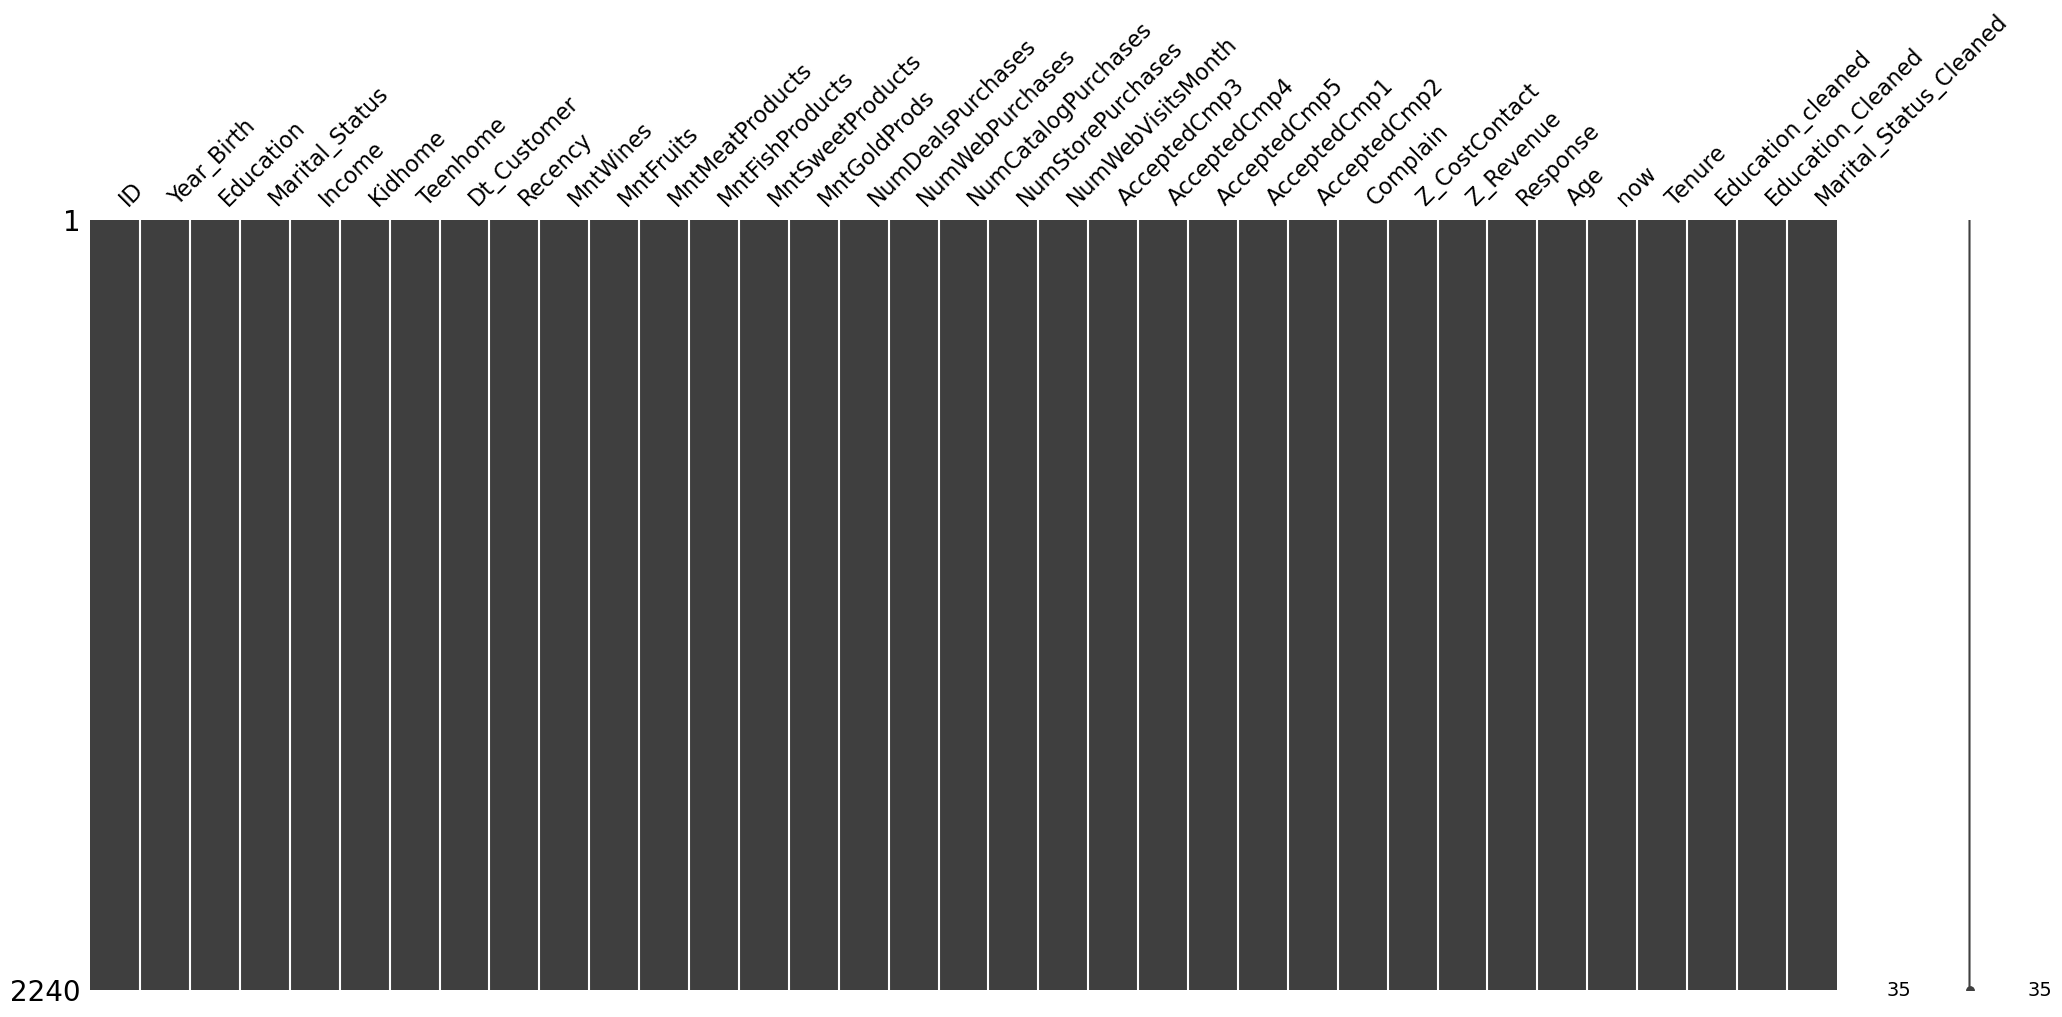

In [31]:
# Deal with missing values 
%matplotlib inline
msno.matrix(marketing)


In [32]:
# we will assume that they are missing at random and fill the values with the mean

missing_value=marketing['Income'].mean()
marketing['Income'].fillna(value=missing_value, inplace=True)

In [33]:
marketing['Income'].describe()

count      2240.000000
mean      52247.251354
std       25037.797168
min        1730.000000
25%       35538.750000
50%       51741.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

In [60]:
# our dataset has been fully cleaned, let us view them
marketing_cleaned = marketing.drop(columns=['Marital_Status', 'Education', 'Year_Birth', 'Dt_Customer'])
marketing_cleaned.columns

Index(['ID', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'now', 'Tenure', 'Education_cleaned', 'Education_Cleaned',
       'Marital_Status_Cleaned'],
      dtype='object')

In [61]:
#Our data is all clean and ready for Analysis

 # Univariate Exploration - Categorical Variables

<AxesSubplot:xlabel='Education_Cleaned', ylabel='count'>

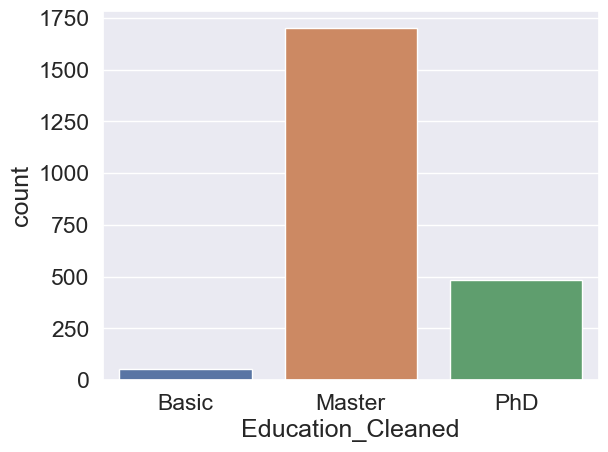

In [62]:
Education_order = ['Basic', 'Master', 'PhD']
sns.countplot(x='Education_Cleaned', data=marketing_cleaned, order=Education_order)

<AxesSubplot:xlabel='Marital_Status_Cleaned', ylabel='count'>

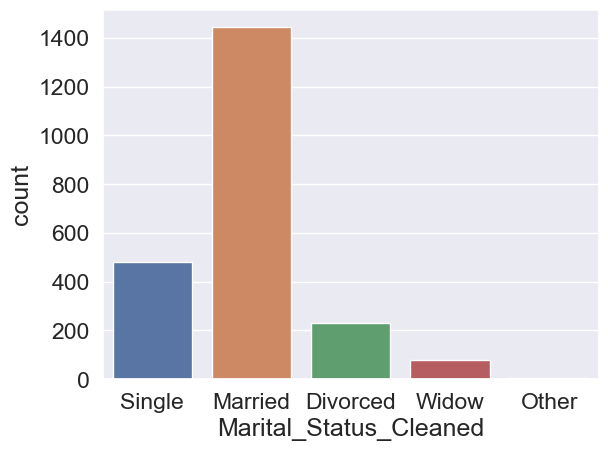

In [63]:
sns.countplot(x='Marital_Status_Cleaned', data=marketing_cleaned)

In [64]:
marketing_cleaned

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Complain,Z_CostContact,Z_Revenue,Response,Age,now,Tenure,Education_cleaned,Education_Cleaned,Marital_Status_Cleaned
0,5524,58138.0,0,0,58,635,88,546,172,88,...,0,3,11,1,66,2023-01-21 11:26:05.881132,1910-05-18 11:26:05.881132,Graduation,Master,Single
1,2174,46344.0,1,1,38,11,1,6,2,1,...,0,3,11,0,69,2023-01-21 11:26:05.881132,1908-11-14 11:26:05.881132,Graduation,Master,Single
2,4141,71613.0,0,0,26,426,49,127,111,21,...,0,3,11,0,58,2023-01-21 11:26:05.881132,1909-06-01 11:26:05.881132,Graduation,Master,Married
3,6182,26646.0,1,0,26,11,4,20,10,3,...,0,3,11,0,39,2023-01-21 11:26:05.881132,1908-12-10 11:26:05.881132,Graduation,Master,Married
4,5324,58293.0,1,0,94,173,43,118,46,27,...,0,3,11,0,42,2023-01-21 11:26:05.881132,1909-01-01 11:26:05.881132,PhD,PhD,Married
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,61223.0,0,1,46,709,43,182,42,118,...,0,3,11,0,56,2023-01-21 11:26:05.881132,1909-08-09 11:26:05.881132,Graduation,Master,Married
2236,4001,64014.0,2,1,56,406,0,30,0,0,...,0,3,11,0,77,2023-01-21 11:26:05.881132,1908-08-12 11:26:05.881132,PhD,PhD,Married
2237,7270,56981.0,0,0,91,908,48,217,32,12,...,0,3,11,0,42,2023-01-21 11:26:05.881132,1908-12-26 11:26:05.881132,Graduation,Master,Divorced
2238,8235,69245.0,0,1,8,428,30,214,80,30,...,0,3,11,0,67,2023-01-21 11:26:05.881132,1908-12-27 11:26:05.881132,Master,Master,Married


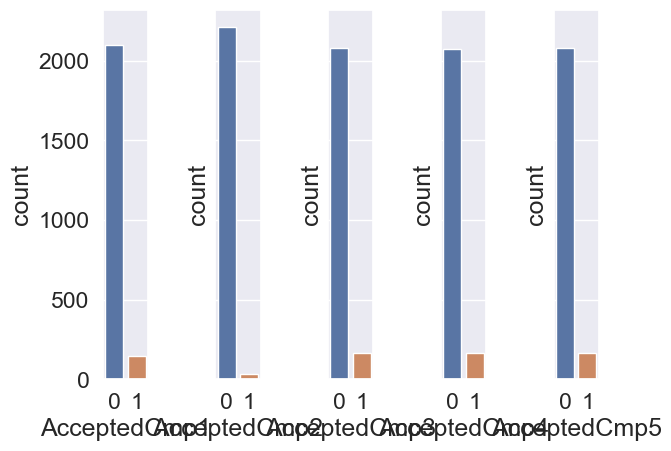

In [65]:
fig, axes = plt.subplots(1, 5, sharey=True)

sns.countplot(data=marketing_cleaned, x='AcceptedCmp1', ax=axes[0])
sns.countplot(data=marketing_cleaned, x='AcceptedCmp2', ax=axes[1])
sns.countplot(data=marketing_cleaned, x='AcceptedCmp3', ax=axes[2])
sns.countplot(data=marketing_cleaned, x='AcceptedCmp4', ax=axes[3])
sns.countplot(data=marketing_cleaned, x='AcceptedCmp5', ax=axes[4])

fig.subplots_adjust(wspace=1.5)

<AxesSubplot:xlabel='Response', ylabel='count'>

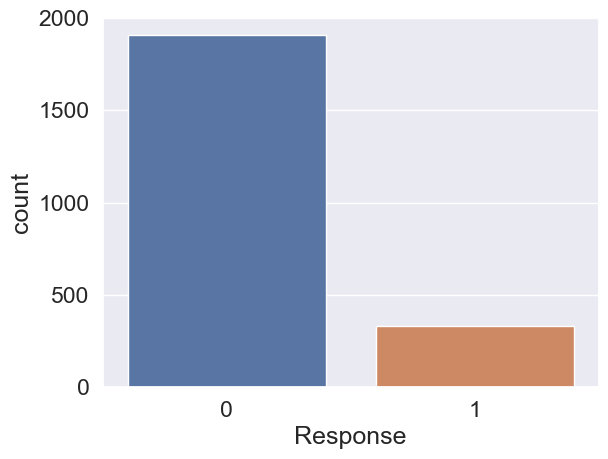

In [66]:
sns.countplot(data=marketing_cleaned, x='Response')

<AxesSubplot:xlabel='Complain', ylabel='count'>

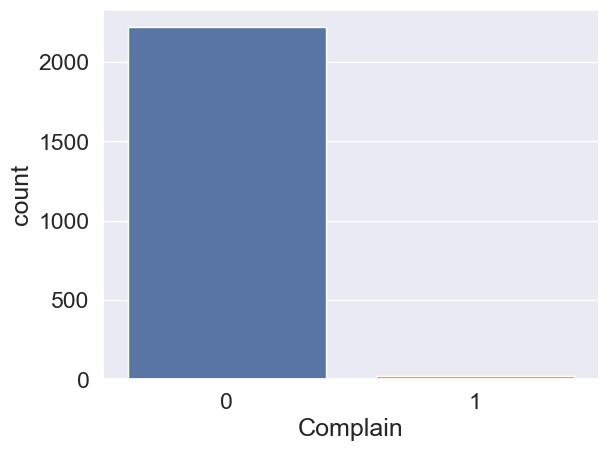

In [67]:
sns.countplot(data=marketing_cleaned, x='Complain')

# Univariate Exploration - Numerical Variables

<AxesSubplot:xlabel='Age', ylabel='Count'>

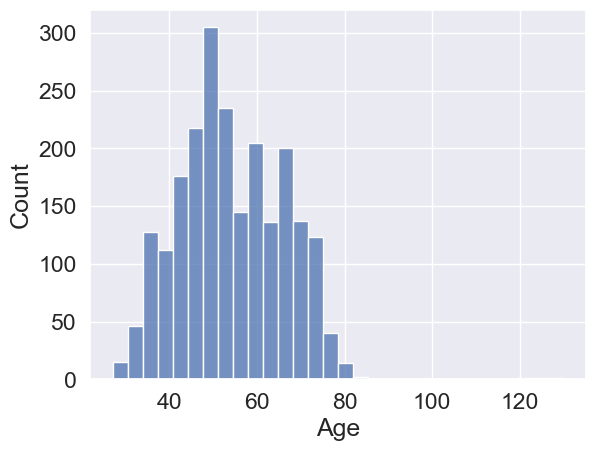

In [68]:
sns.histplot(data=marketing_cleaned, x='Age', bins=30)

<AxesSubplot:xlabel='Income'>

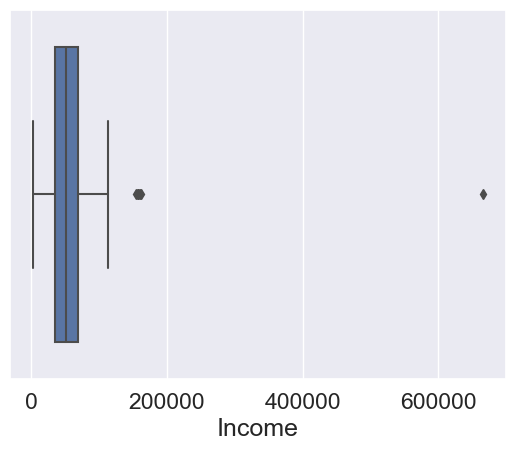

In [69]:
sns.boxplot(data=marketing_cleaned, x='Income')

<AxesSubplot:xlabel='Kidhome', ylabel='count'>

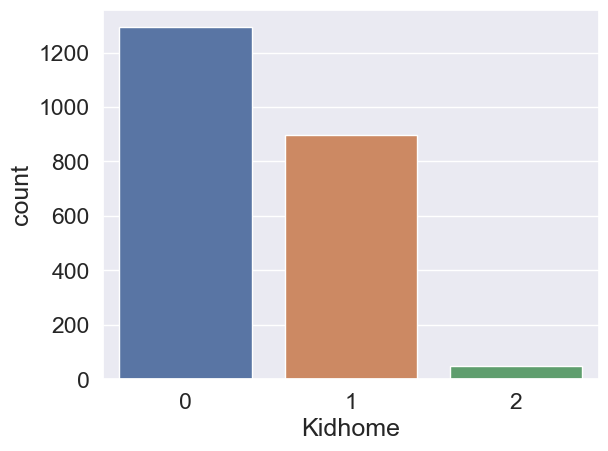

In [70]:
sns.countplot(data=marketing_cleaned, x='Kidhome')

<AxesSubplot:xlabel='Teenhome', ylabel='count'>

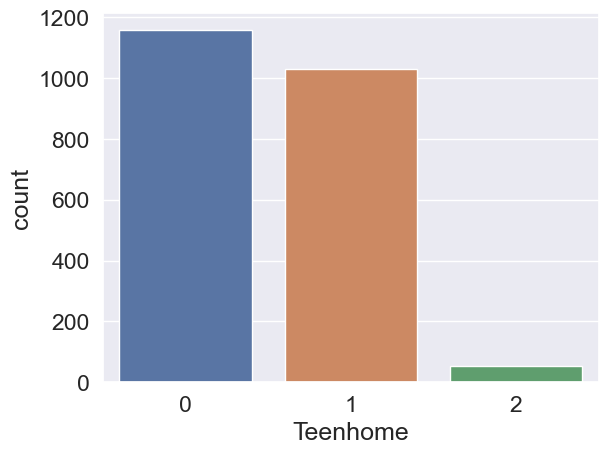

In [71]:
sns.countplot(data=marketing_cleaned, x='Teenhome')

<AxesSubplot:xlabel='Recency', ylabel='Count'>

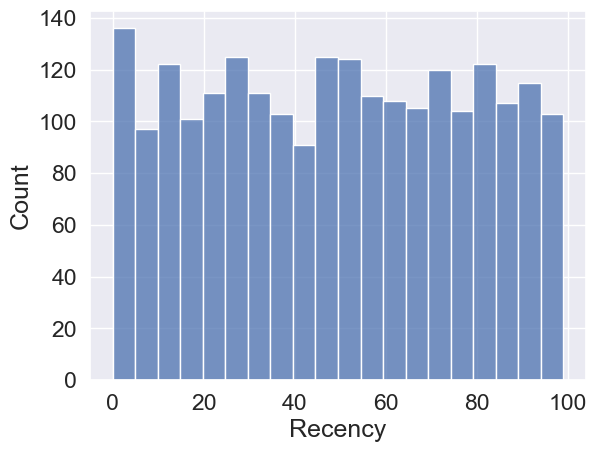

In [72]:
sns.histplot(data=marketing_cleaned, x='Recency', bins=20)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'MntWines'),
  Text(1, 0, 'MntFruits'),
  Text(2, 0, 'MntFishProducts'),
  Text(3, 0, 'MntMeatProducts'),
  Text(4, 0, 'MntSweetProducts'),
  Text(5, 0, 'MntGoldProds')])

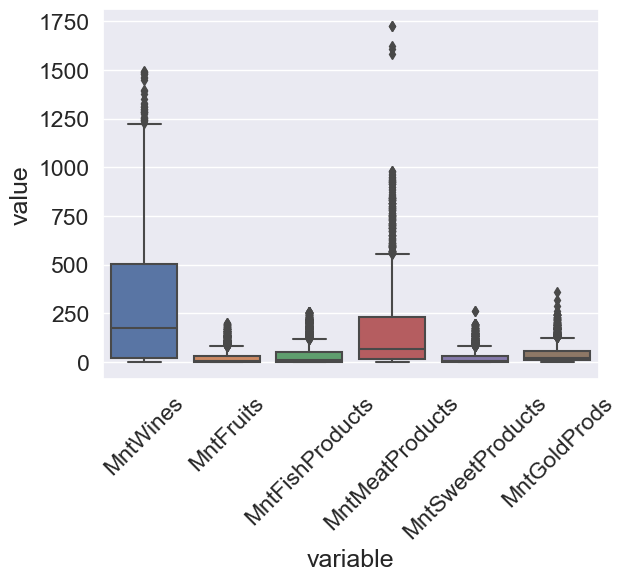

In [73]:
# we will be visualizing the amounts column using a Box and Whisker Plot

marketing_mnt=marketing_cleaned[['MntWines', 'MntFruits', 'MntFishProducts', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
marketing_mnt_melted=pd.melt(marketing_mnt)

sns.boxplot(x='variable', y='value', data=marketing_mnt_melted)
plt.xticks(rotation=45)

In [74]:
# Visualizing the 'number of purchases' columns in box plots
marketing.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,now,Tenure,Education_cleaned,Education_Cleaned,Marital_Status_Cleaned
0,5524,1957,Graduation,Single,58138.0,0,0,41156,58,635,...,0,3,11,1,66,2023-01-21 11:26:05.881132,1910-05-18 11:26:05.881132,Graduation,Master,Single
1,2174,1954,Graduation,Single,46344.0,1,1,41706,38,11,...,0,3,11,0,69,2023-01-21 11:26:05.881132,1908-11-14 11:26:05.881132,Graduation,Master,Single
2,4141,1965,Graduation,Together,71613.0,0,0,41507,26,426,...,0,3,11,0,58,2023-01-21 11:26:05.881132,1909-06-01 11:26:05.881132,Graduation,Master,Married
3,6182,1984,Graduation,Together,26646.0,1,0,41680,26,11,...,0,3,11,0,39,2023-01-21 11:26:05.881132,1908-12-10 11:26:05.881132,Graduation,Master,Married
4,5324,1981,PhD,Married,58293.0,1,0,41658,94,173,...,0,3,11,0,42,2023-01-21 11:26:05.881132,1909-01-01 11:26:05.881132,PhD,PhD,Married


In [75]:
marketing_num=marketing_cleaned[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases']]

(array([0, 1, 2, 3]),
 [Text(0, 0, 'NumDealsPurchases'),
  Text(1, 0, 'NumWebPurchases'),
  Text(2, 0, 'NumCatalogPurchases'),
  Text(3, 0, 'NumStorePurchases')])

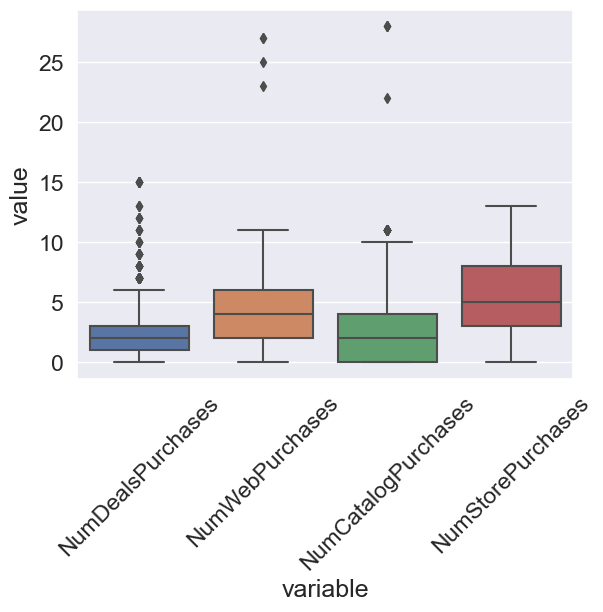

In [76]:
# visualize all the 'number of purchases' columns together with box plots

marketing_num=marketing_cleaned[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]
marketing_num_melted=pd.melt(marketing_num)

sns.boxplot(x='variable', y='value', data=marketing_num_melted)
plt.xticks(rotation=45)

<AxesSubplot:ylabel='NumWebVisitsMonth'>

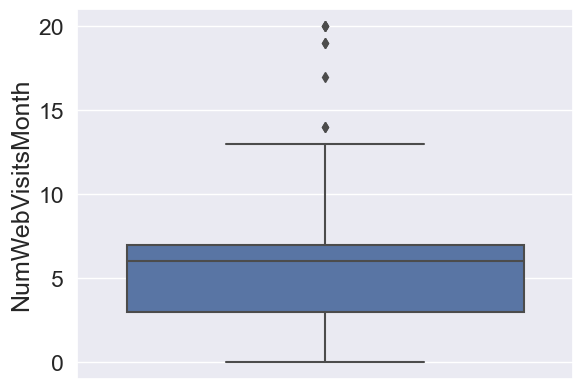

In [77]:
sns.boxplot(data=marketing_cleaned, y='NumWebVisitsMonth')

## Findings From Univariate Exploration:

1) campaign 2 was the least perfoRming campaign

2) customers spent the most on wine, followed by meat

3) store seems to be customers' favourite channel of purchasing, followed by web

4) more than 10% of customers accepted offer from the last campaign

5) customers seem to be overall satisfied since there's minimal complaints

## Bivariate Analysis

<AxesSubplot:>

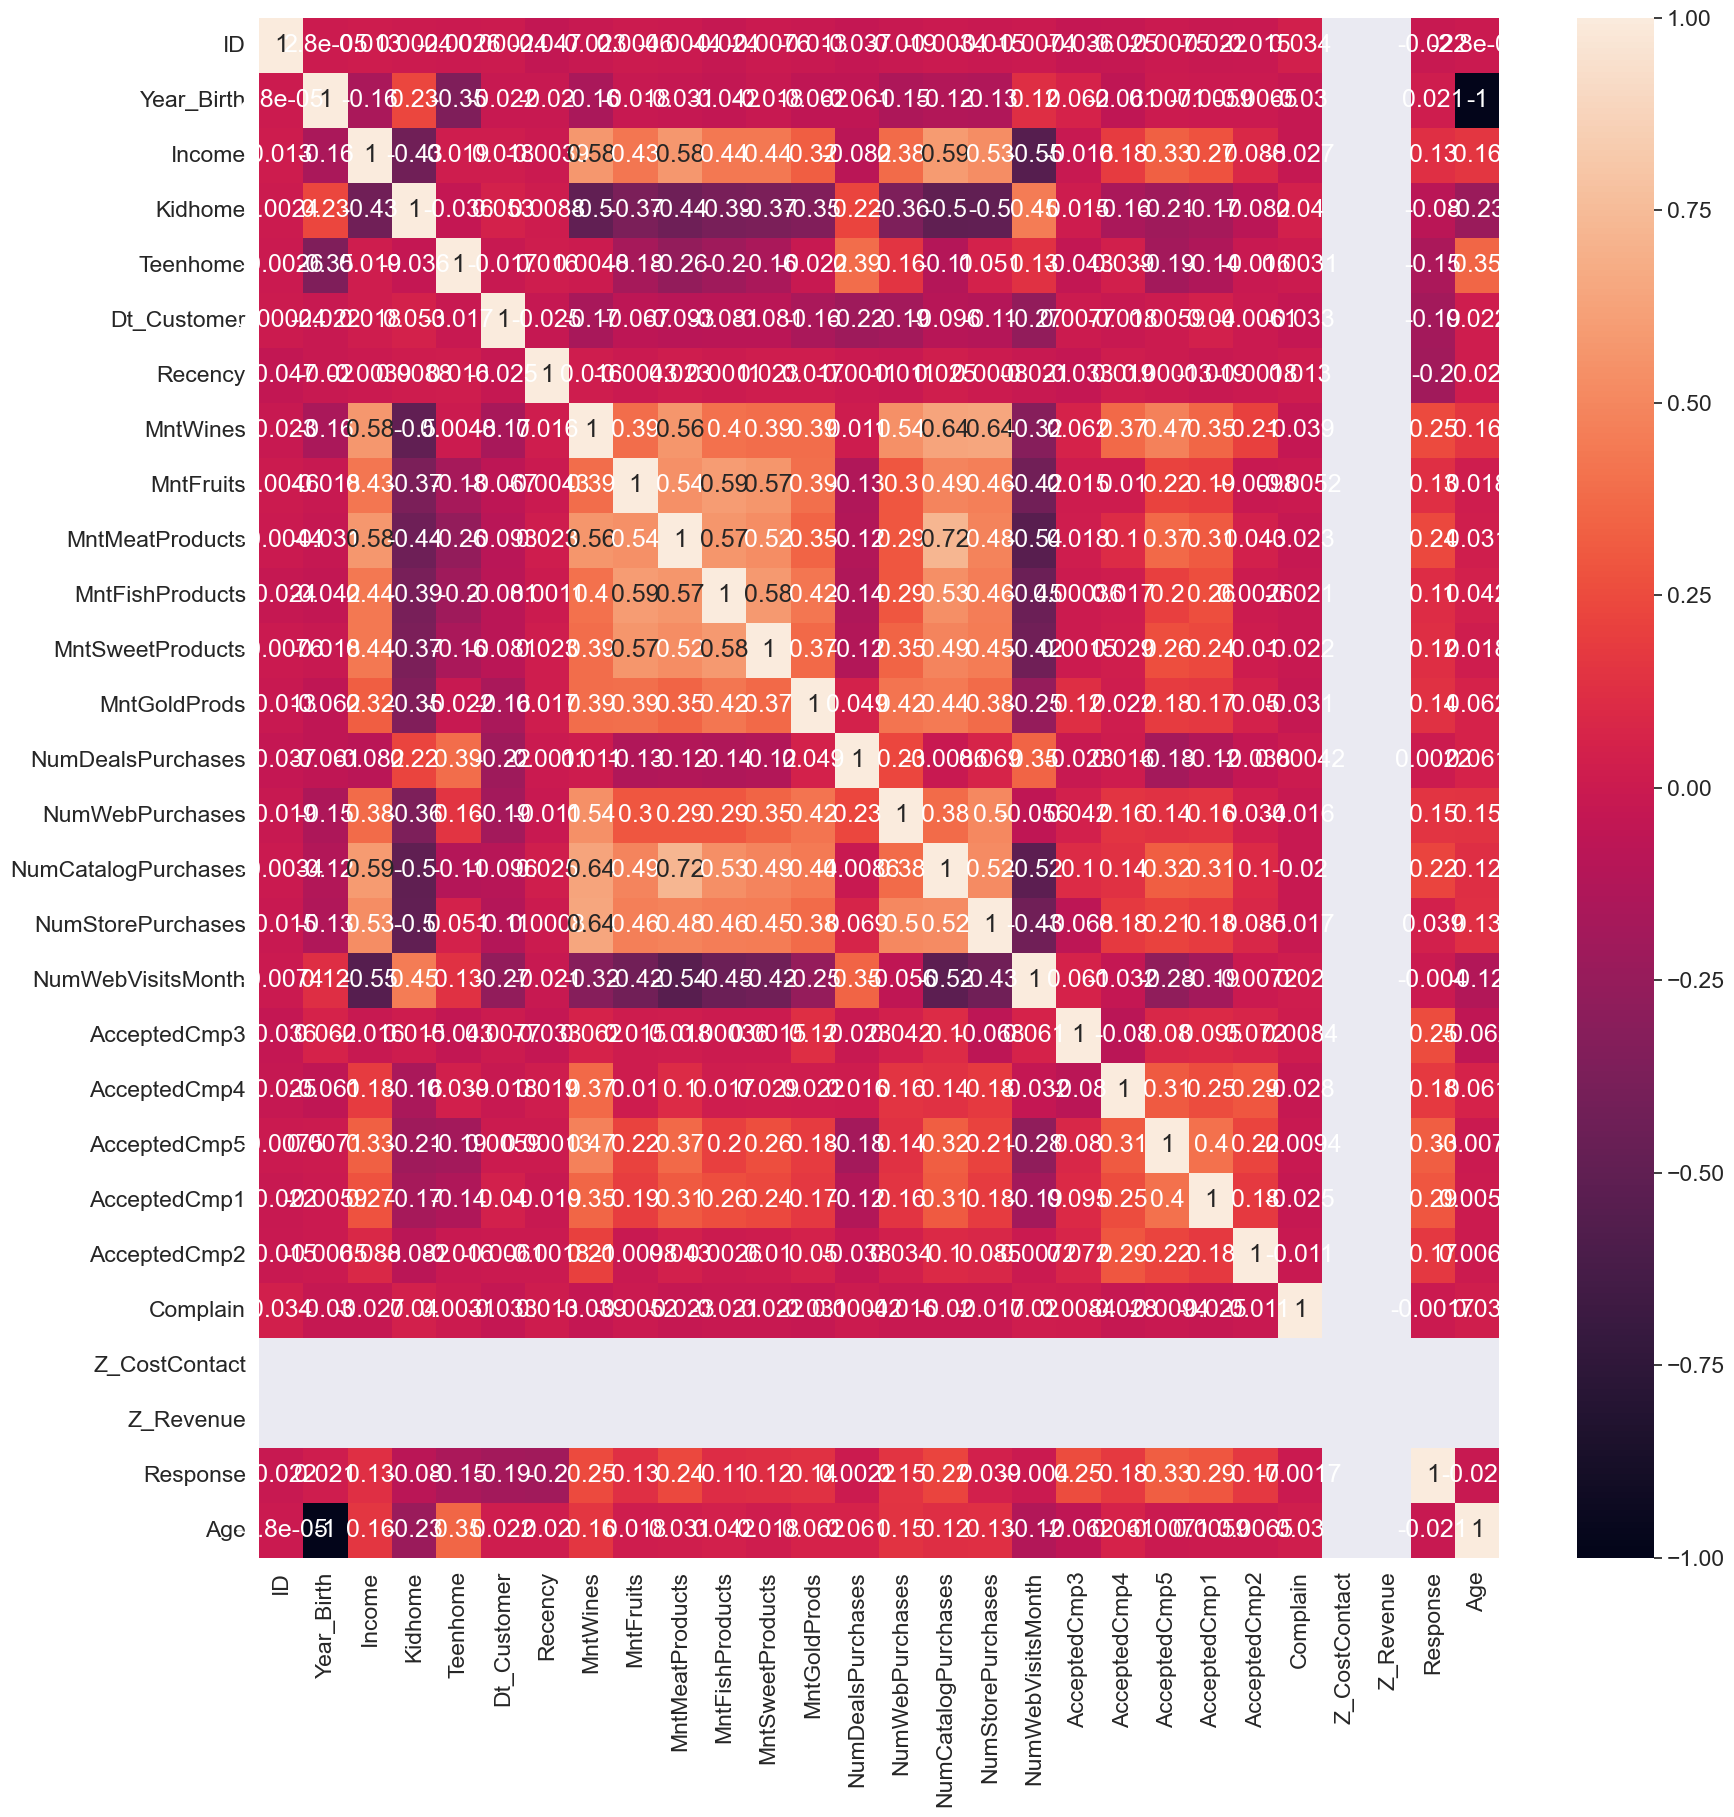

In [78]:
# first, correlation matrix and a heatmap to visualize it so I know which variables to look into next

corr_mat= marketing.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_mat, annot=True)

In [79]:
# I want to single out the columns with the strongest correlations

c=corr_mat.abs()
s=c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
so=so[so!=1] #excluse the 1s
so

Year_Birth           Age                    1.000000
Age                  Year_Birth             1.000000
NumCatalogPurchases  MntMeatProducts        0.723827
MntMeatProducts      NumCatalogPurchases    0.723827
NumStorePurchases    MntWines               0.642100
                                              ...   
Z_Revenue            Age                         NaN
Response             Z_CostContact               NaN
                     Z_Revenue                   NaN
Age                  Z_CostContact               NaN
                     Z_Revenue                   NaN
Length: 758, dtype: float64

In [80]:
# select moderate to strong correlations (>=0.5, anything above 0.7 is considered strong, above 0.5 is moderate)

so_corr=so[so>=0.5].drop_duplicates()
so_corr

Year_Birth           Age                    1.000000
NumCatalogPurchases  MntMeatProducts        0.723827
NumStorePurchases    MntWines               0.642100
NumCatalogPurchases  MntWines               0.635226
MntFishProducts      MntFruits              0.594804
NumCatalogPurchases  Income                 0.586725
MntSweetProducts     MntFishProducts        0.579870
Income               MntMeatProducts        0.577802
MntWines             Income                 0.576789
MntMeatProducts      MntFishProducts        0.568402
MntFruits            MntSweetProducts       0.567164
MntMeatProducts      MntWines               0.562667
Income               NumWebVisitsMonth      0.549824
MntMeatProducts      MntFruits              0.543105
MntWines             NumWebPurchases        0.542265
MntMeatProducts      NumWebVisitsMonth      0.539470
MntFishProducts      NumCatalogPurchases    0.534478
NumStorePurchases    Income                 0.526489
MntMeatProducts      MntSweetProducts       0.

<AxesSubplot:xlabel='MntFishProducts', ylabel='NumCatalogPurchases'>

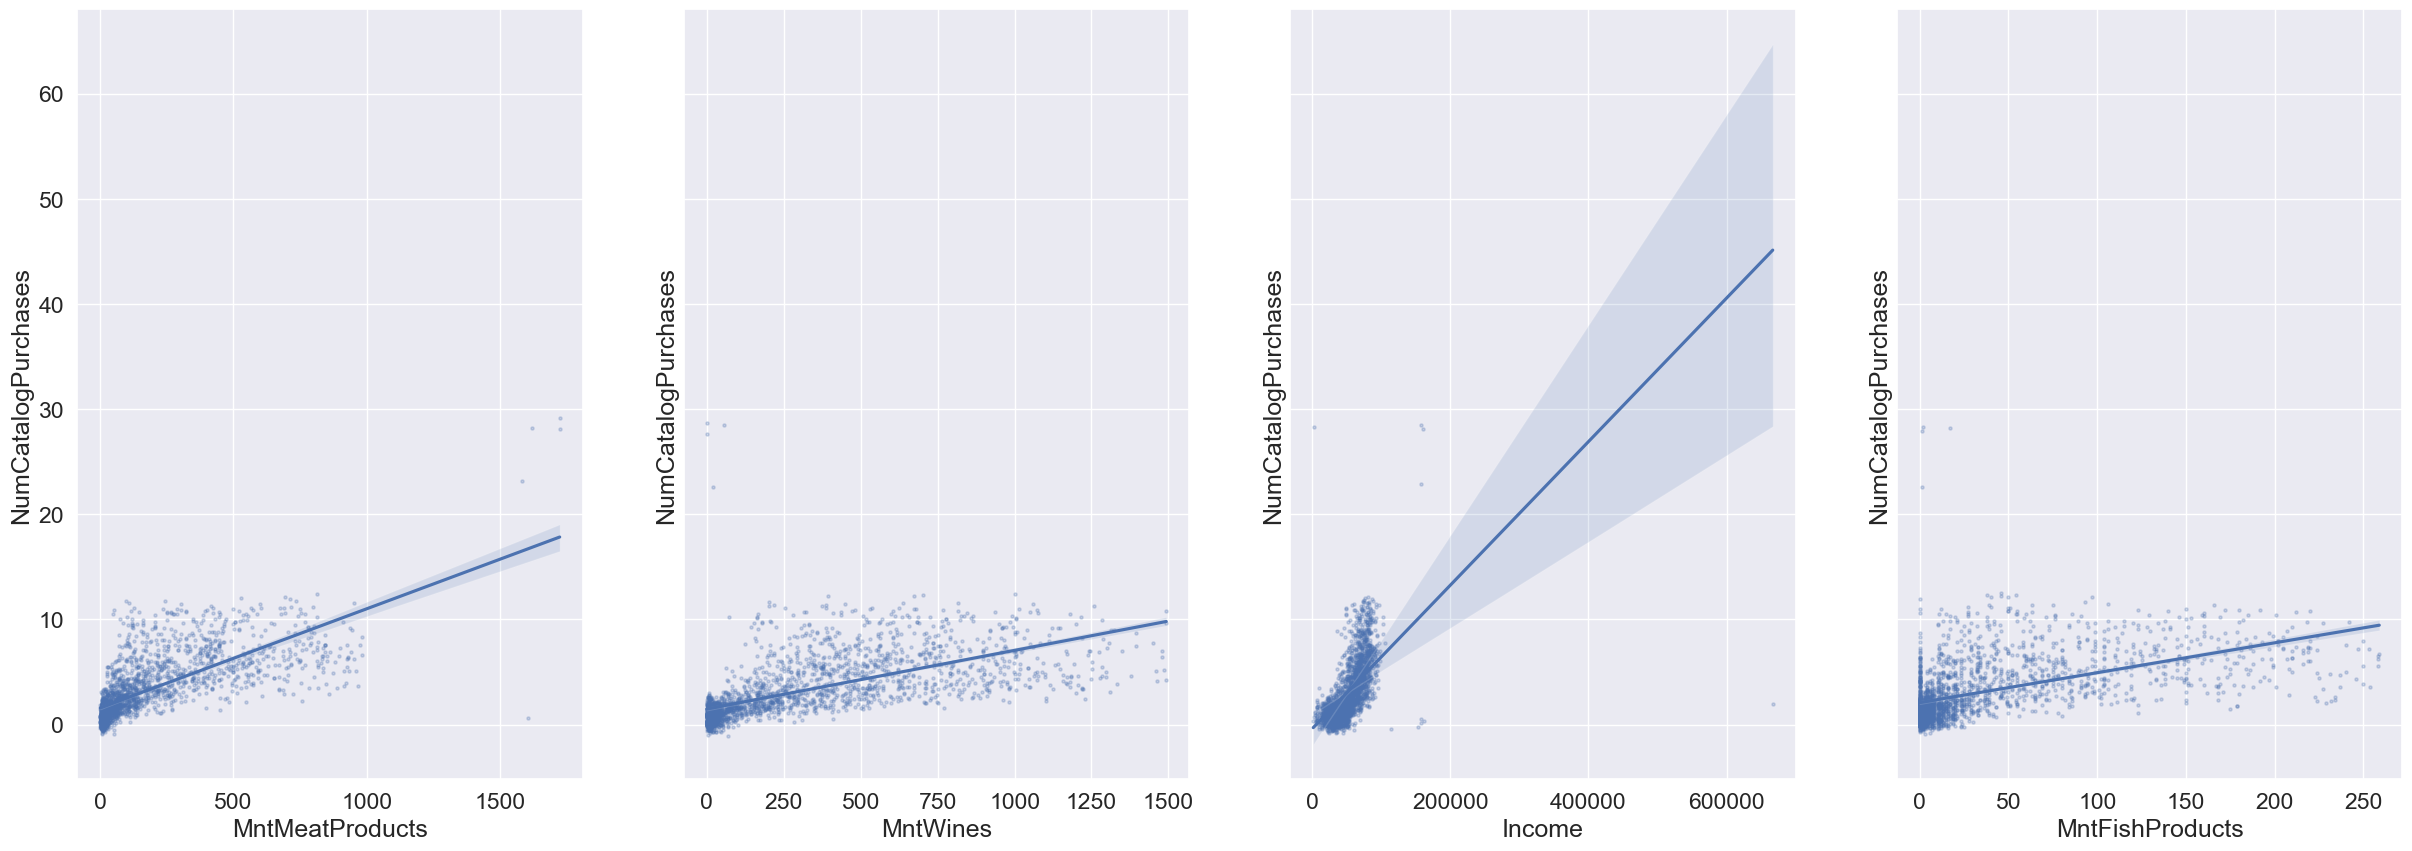

In [82]:
# plot NumCatalogPurchases against: MntMeatProducts, MntWines, Income, MntFishProducts

def jitter(values, j):
    return values+np.random.normal(j, 0.5, values.shape)

sns.set(font_scale = 1.5)
fig, ax=plt.subplots(1,4,figsize=(30,10), sharey=True)

sns.regplot(y=jitter(marketing_cleaned.NumCatalogPurchases, 0.5), x=marketing_cleaned.MntMeatProducts, scatter_kws={'alpha':0.25, 's':5}, ax=ax[0])
sns.regplot(y=jitter(marketing_cleaned.NumCatalogPurchases, 0.5), x=marketing_cleaned.MntWines, scatter_kws={'alpha':0.25, 's':5}, ax=ax[1])
sns.regplot(y=jitter(marketing_cleaned.NumCatalogPurchases, 0.5), x=marketing_cleaned.Income, scatter_kws={'alpha':0.25, 's':5}, ax=ax[2])
sns.regplot(y=jitter(marketing_cleaned.NumCatalogPurchases, 0.5), x=marketing_cleaned.MntFishProducts, scatter_kws={'alpha':0.25, 's':5}, ax=ax[3])


<AxesSubplot:xlabel='Income', ylabel='NumStorePurchases'>

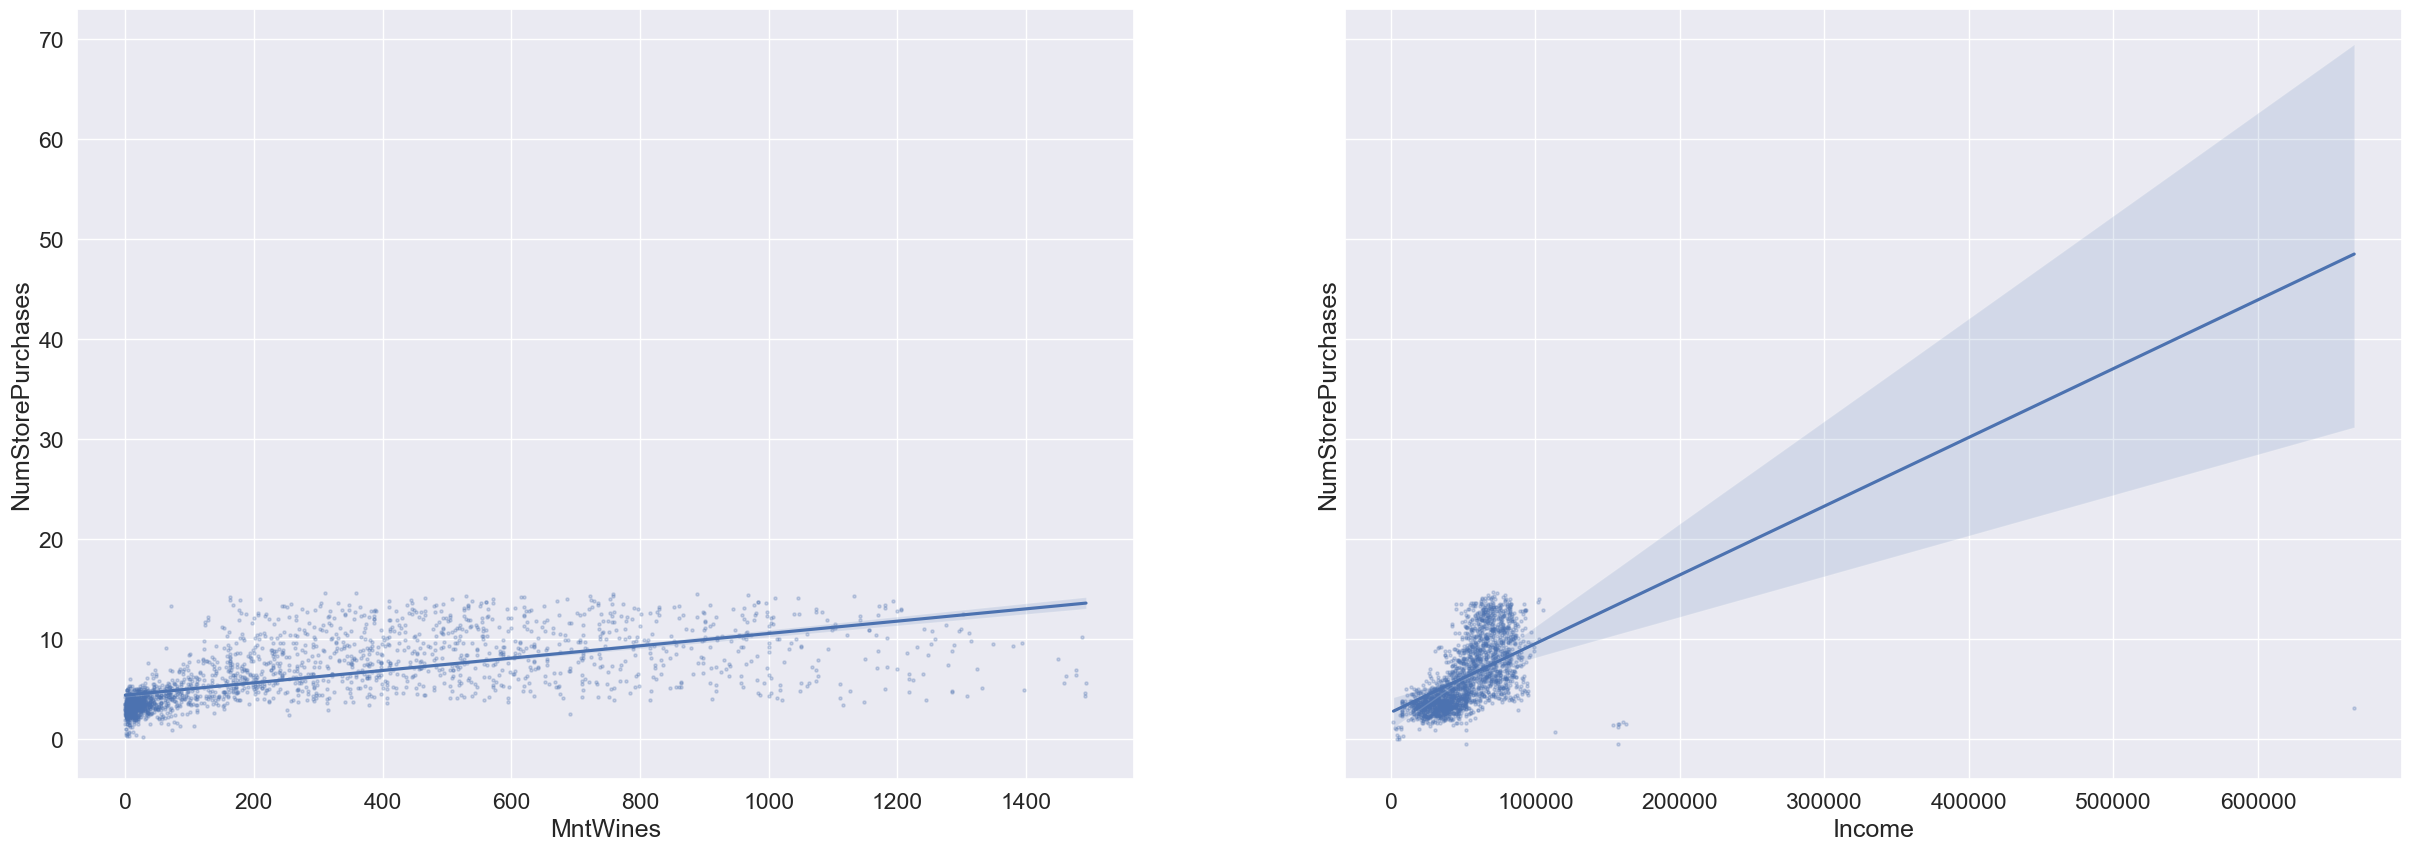

In [83]:
# plot NumStorePurchases against: MntWines, Income

fig, ax=plt.subplots(1,2, figsize=(30,10), sharey=True)

sns.regplot(y=jitter(marketing_cleaned.NumStorePurchases, 0.5), x=marketing_cleaned.MntWines, scatter_kws={'alpha':0.25, 's':5}, ax=ax[0])
sns.regplot(y=jitter(marketing_cleaned.NumStorePurchases, 0.5), x=marketing_cleaned.Income, scatter_kws={'alpha':0.25, 's':5}, ax=ax[1])


<AxesSubplot:xlabel='MntWines', ylabel='NumWebPurchases'>

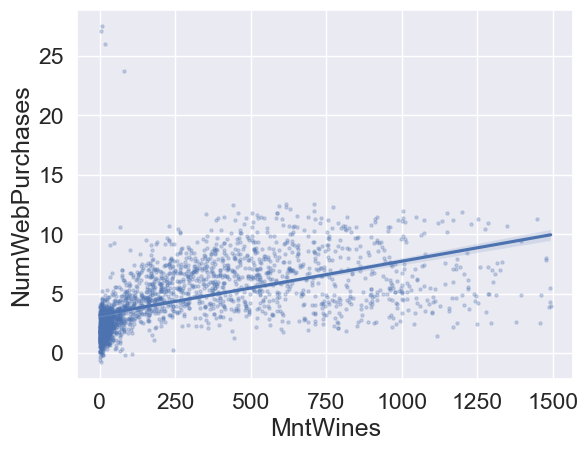

In [85]:
# plot NumWebPurchases against: MntWines

sns.regplot(y=jitter(marketing_cleaned.NumWebPurchases, 0.5), x=marketing_cleaned.MntWines, scatter_kws={'alpha':0.25, 's':5})


<AxesSubplot:xlabel='NumWebPurchases', ylabel='NumWebVisitsMonth'>

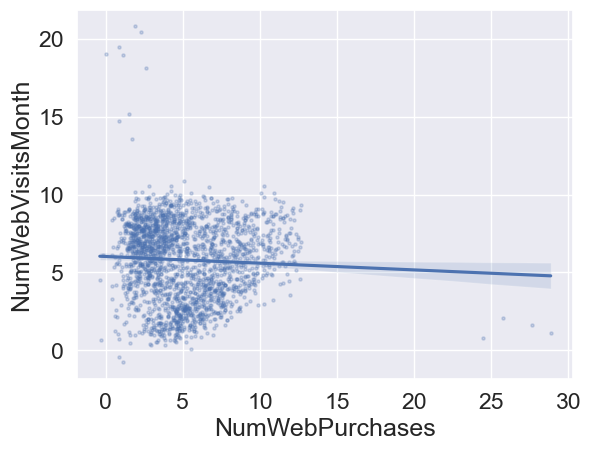

In [87]:
# plot NumWebVisitsMonth against NumWebPurchases

sns.regplot(y=jitter(marketing_cleaned.NumWebVisitsMonth, 0.5), x=jitter(marketing_cleaned.NumWebPurchases, 1), scatter_kws={'alpha':0.25, 's':5})


In [88]:
# There seems to be a weak and negative correlation between number of web visits and number of web purchases
# More attention shoudl be drawn to our website, as it may not be woorking well.

<AxesSubplot:xlabel='Income', ylabel='MntWines'>

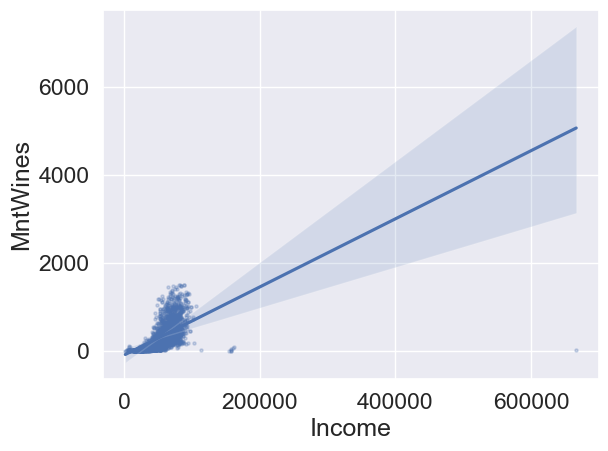

In [89]:
# plot MntWines against Income

sns.regplot(y=jitter(marketing_cleaned.MntWines, 0.5), x=jitter(marketing_cleaned.Income, 1), scatter_kws={'alpha':0.25, 's':5})


<AxesSubplot:xlabel='NumWebVisitsMonth', ylabel='MntMeatProducts'>

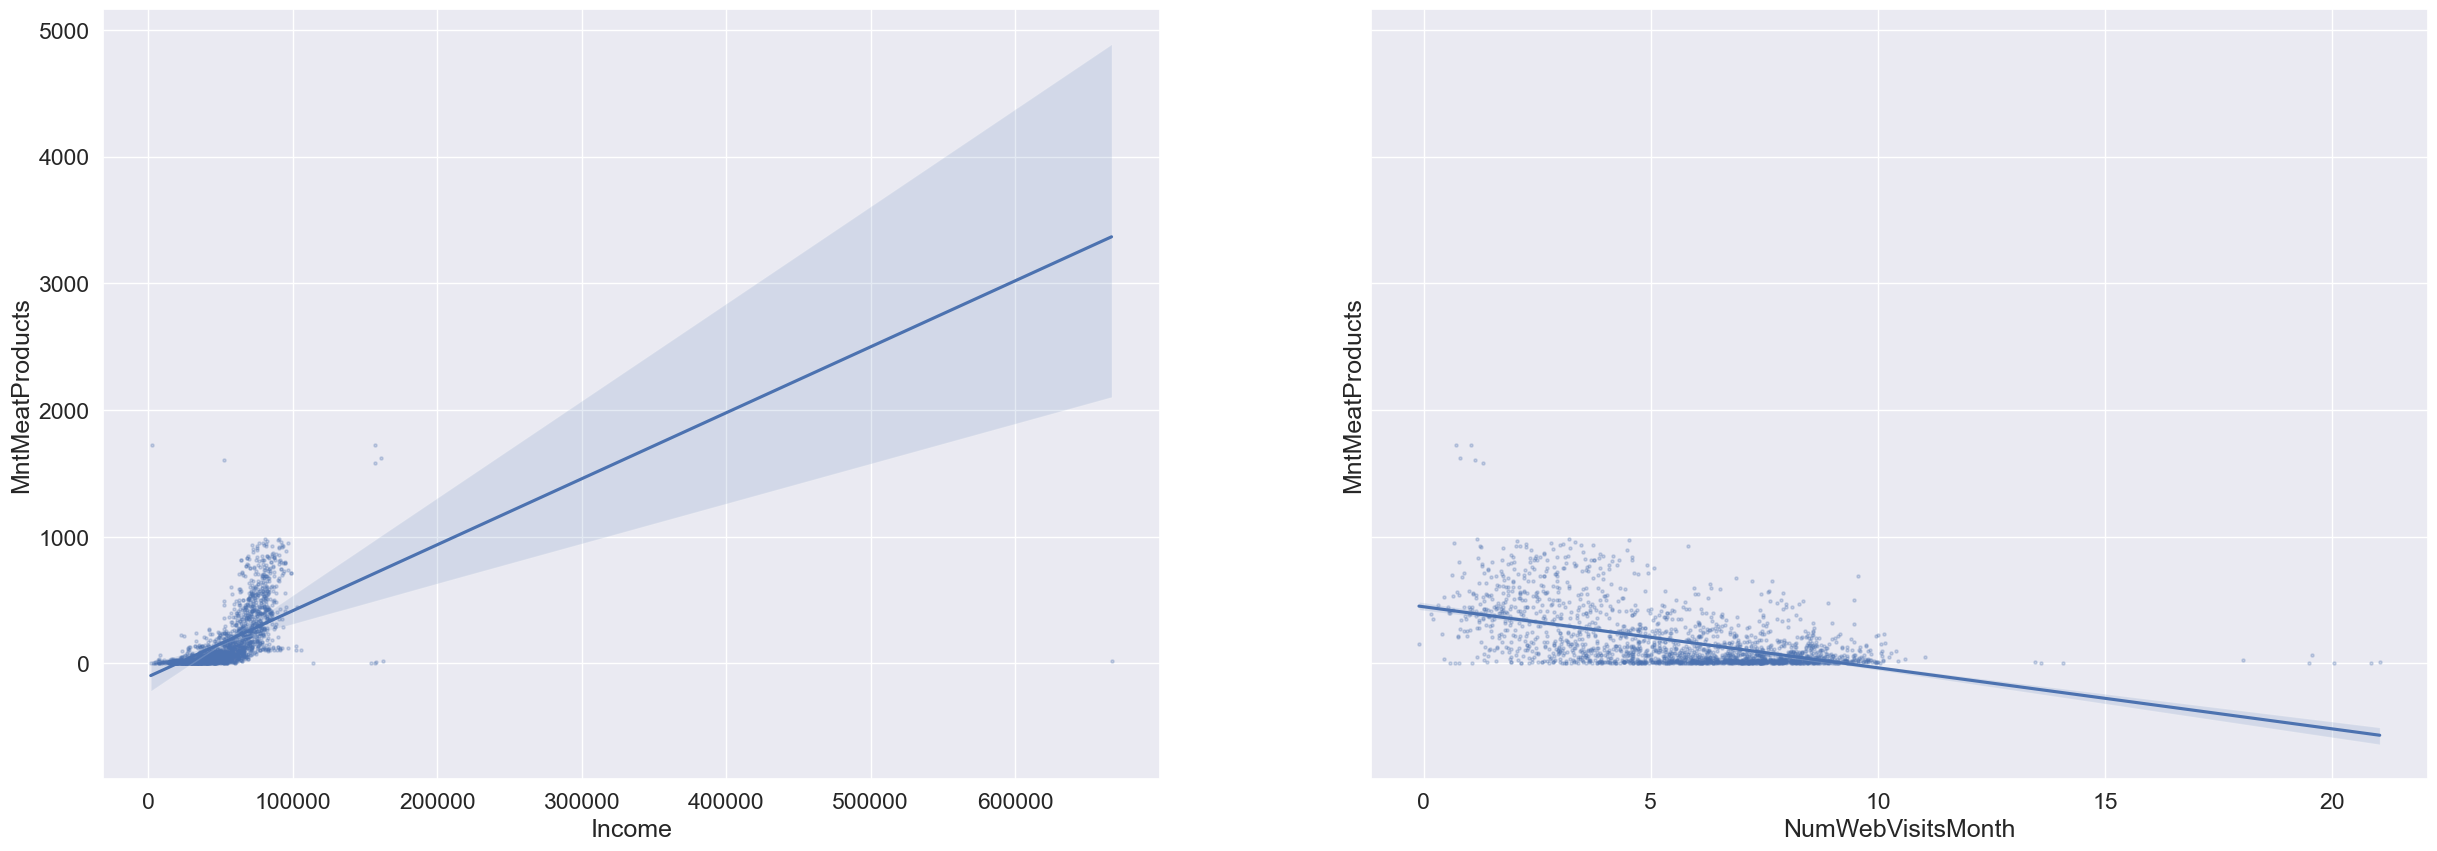

In [90]:
# plot MntMeatProducts against: Income and NumWebVisitsMonth

fig, ax=plt.subplots(1,2, figsize=(30,10), sharey=True)

sns.regplot(y=jitter(marketing_cleaned.MntMeatProducts, 0.5), x=marketing_cleaned.Income, scatter_kws={'alpha':0.25, 's':5}, ax=ax[0])
sns.regplot(y=jitter(marketing_cleaned.MntMeatProducts, 0.5), x=jitter(marketing_cleaned.NumWebVisitsMonth, 0.5), scatter_kws={'alpha':0.25, 's':5}, ax=ax[1])


<AxesSubplot:>

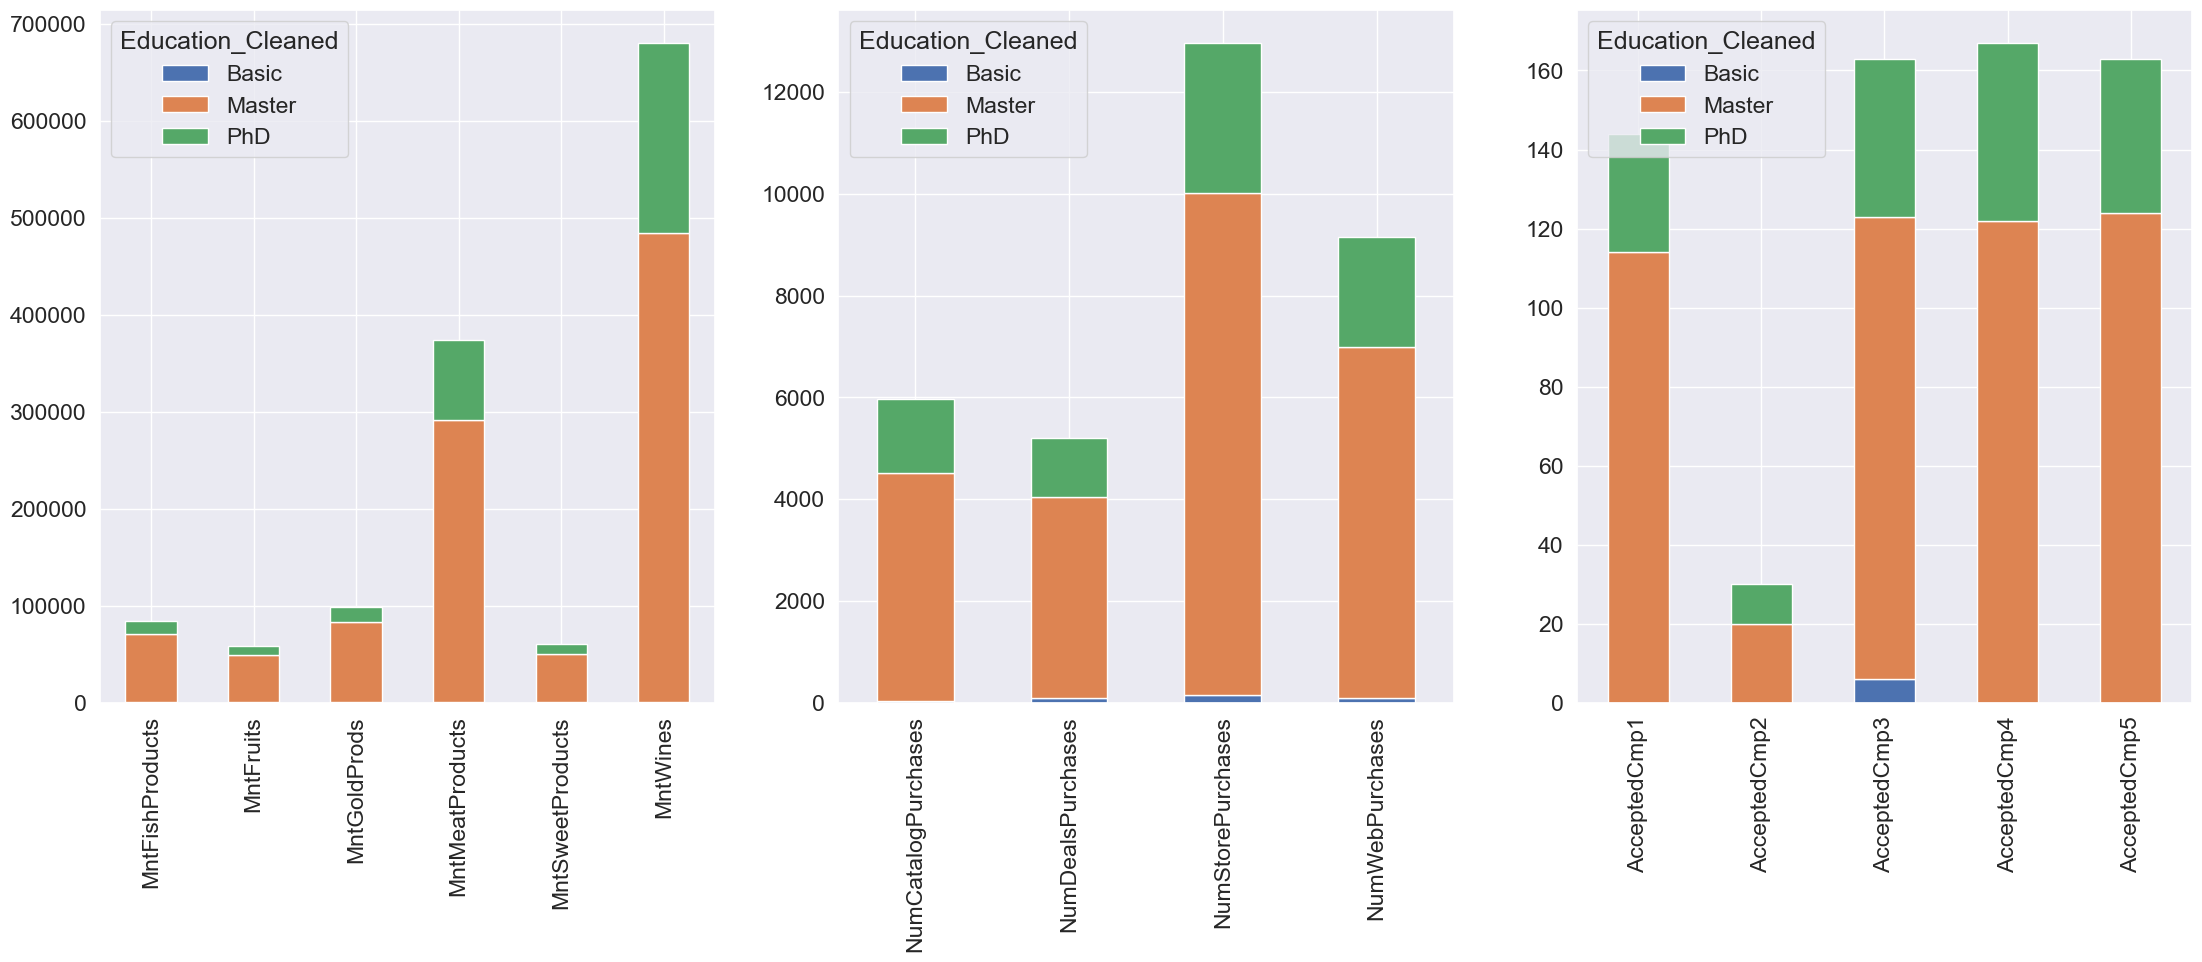

In [91]:
# explore the relationship between Education and amounts spent on different kinds of products, sales channels and their favourite campaigns

marketing_mnt_edu_pivot=pd.pivot_table(data=marketing_cleaned, values=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], columns='Education_Cleaned', aggfunc=np.sum)
marketing_num_edu_pivot=pd.pivot_table(data=marketing_cleaned, values=['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases'], columns='Education_Cleaned', aggfunc=np.sum)
marketing_cmp_edu_pivot=pd.pivot_table(data=marketing_cleaned, values=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'], columns='Education_Cleaned', aggfunc=np.sum)

fig, ax = plt.subplots(1,3,figsize=(27,9))

marketing_mnt_edu_pivot.plot(kind='bar', stacked=True, ax=ax[0])
marketing_num_edu_pivot.plot(kind='bar', stacked=True, ax=ax[1])
marketing_cmp_edu_pivot.plot(kind='bar', stacked=True, ax=ax[2])

<AxesSubplot:>

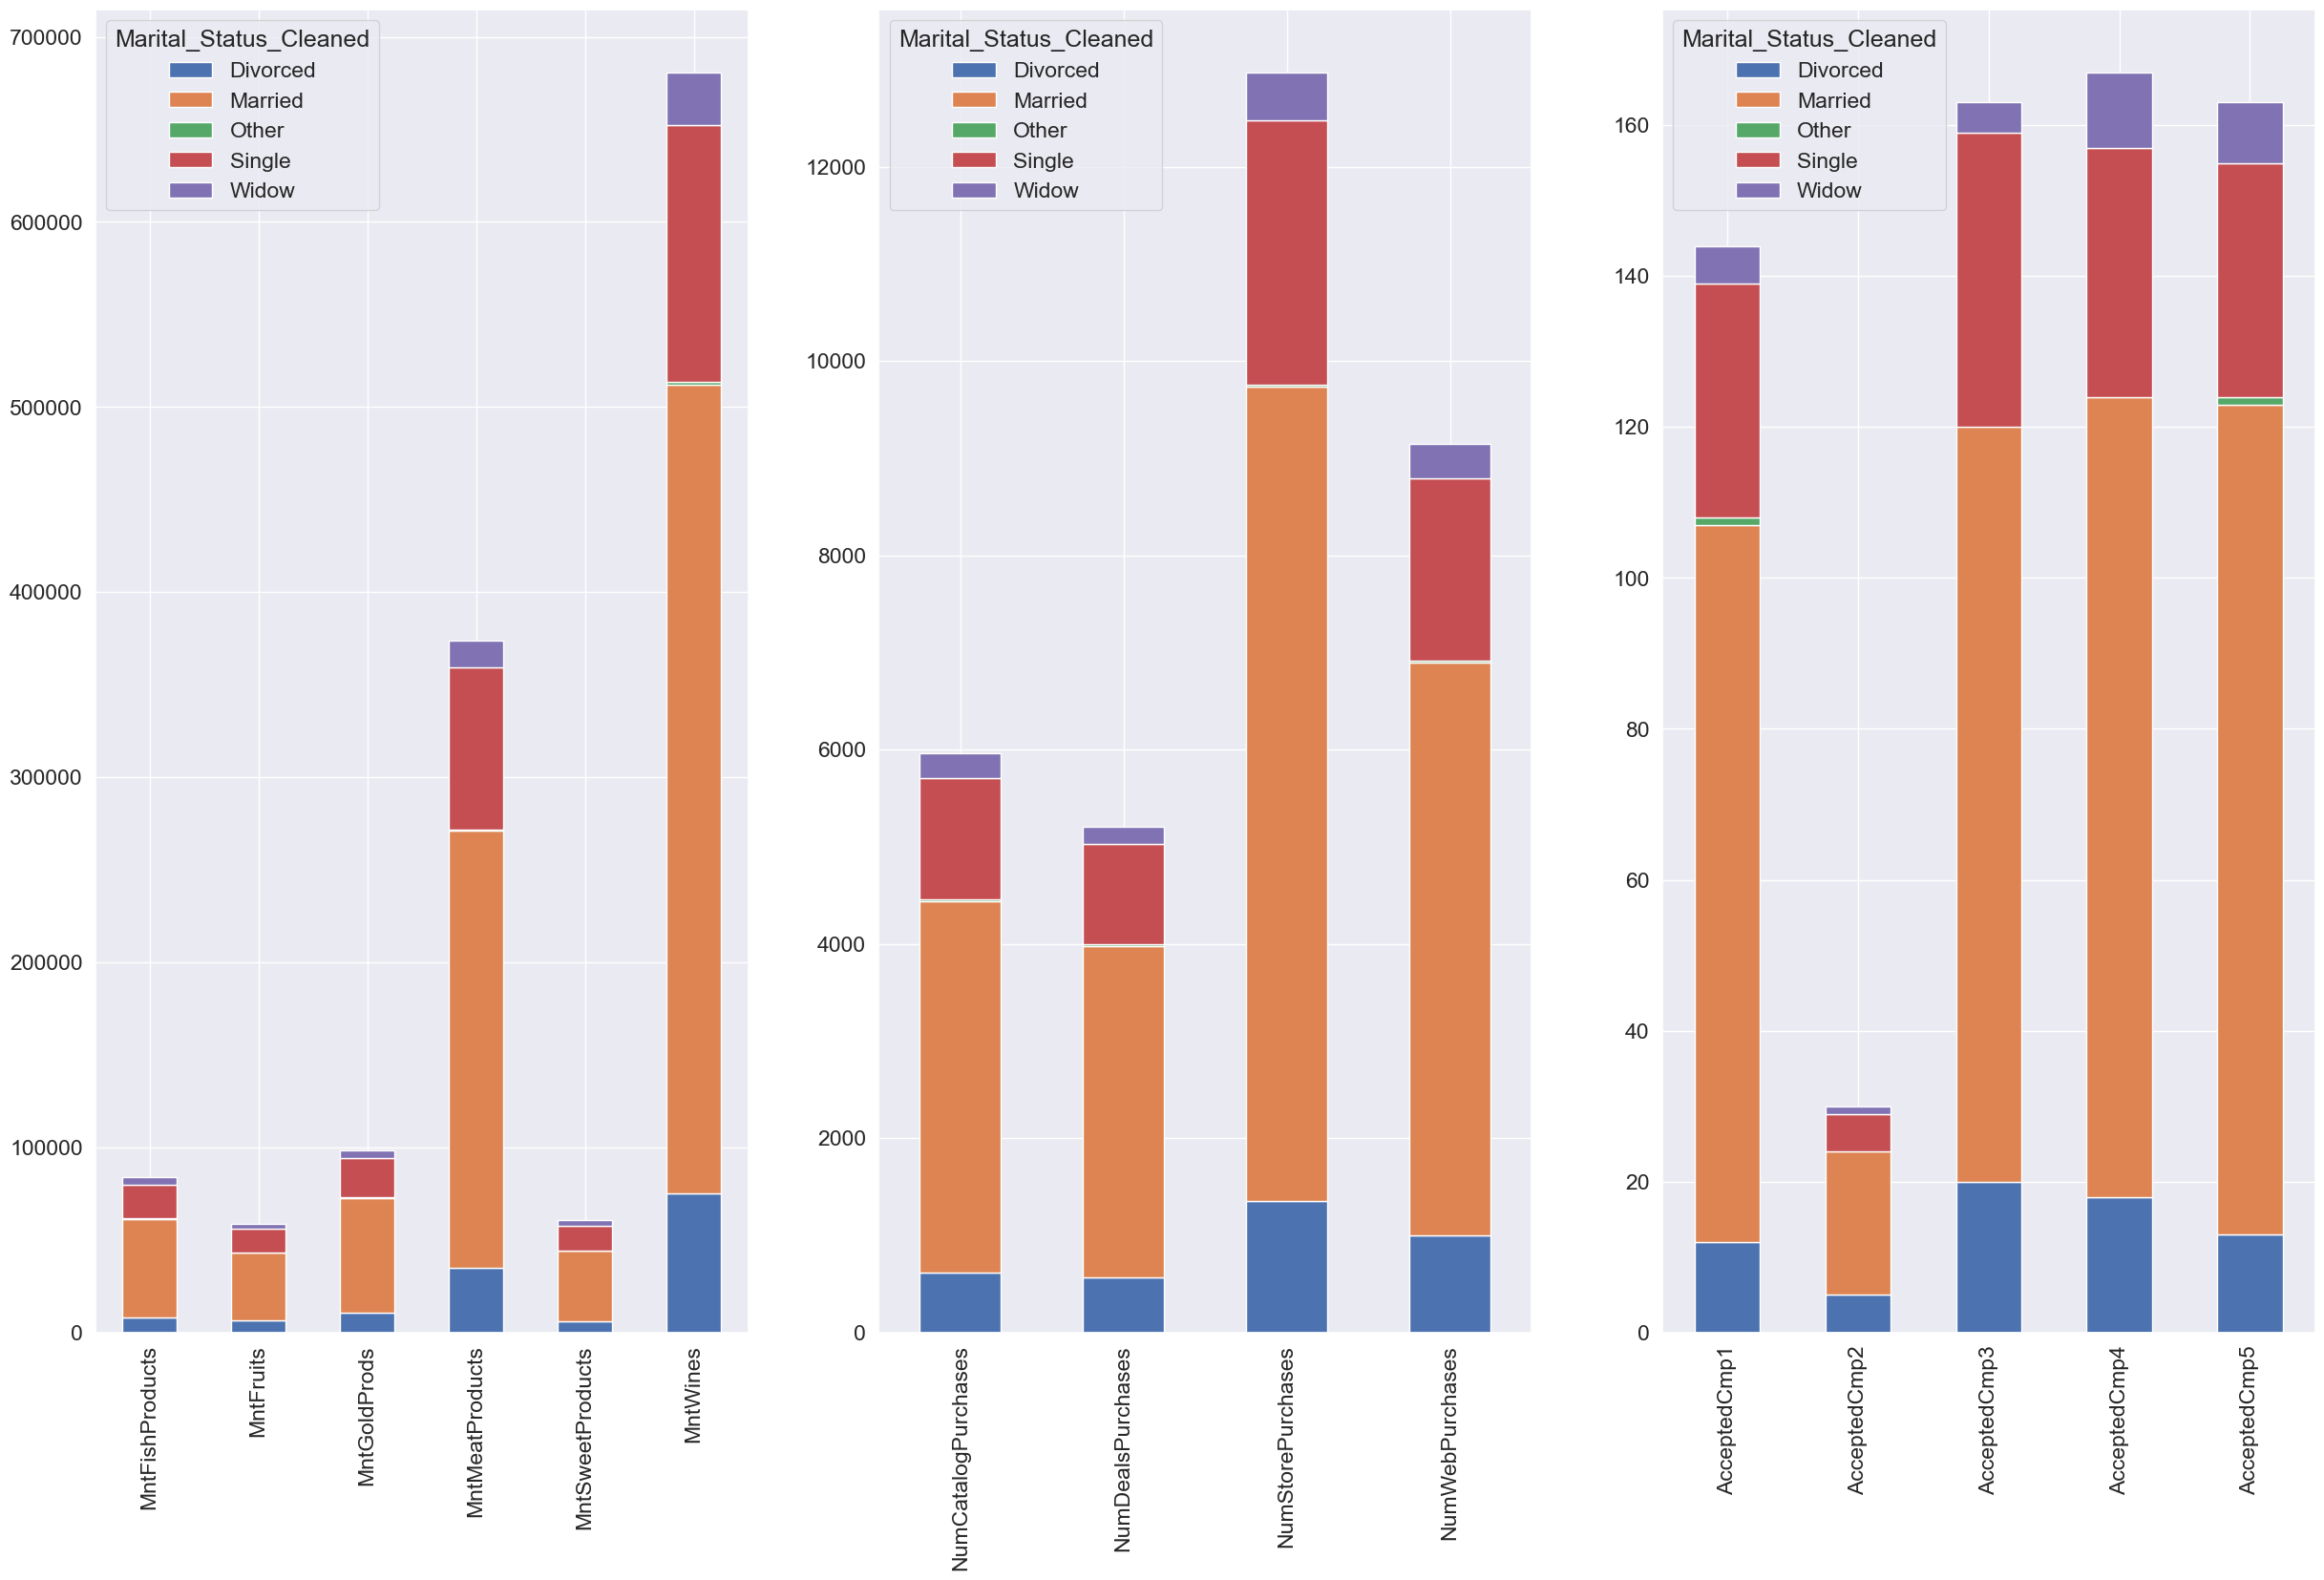

In [92]:
# explore the relationship between Marital Status and amounts spent on different kinds of products, sales channels and their favourite campaigns

marketing_mnt_ms_pivot=pd.pivot_table(data=marketing_cleaned, values=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], columns='Marital_Status_Cleaned', aggfunc=np.sum)
marketing_num_ms_pivot=pd.pivot_table(data=marketing_cleaned, values=['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases'], columns='Marital_Status_Cleaned', aggfunc=np.sum)
marketing_cmp_ms_pivot=pd.pivot_table(data=marketing_cleaned, values=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'], columns='Marital_Status_Cleaned', aggfunc=np.sum)

fig, ax = plt.subplots(1,3,figsize=(30,18))

marketing_mnt_ms_pivot.plot(kind='bar', stacked=True, ax=ax[0])
marketing_num_ms_pivot.plot(kind='bar', stacked=True, ax=ax[1])
marketing_cmp_ms_pivot.plot(kind='bar', stacked=True, ax=ax[2])

<AxesSubplot:>

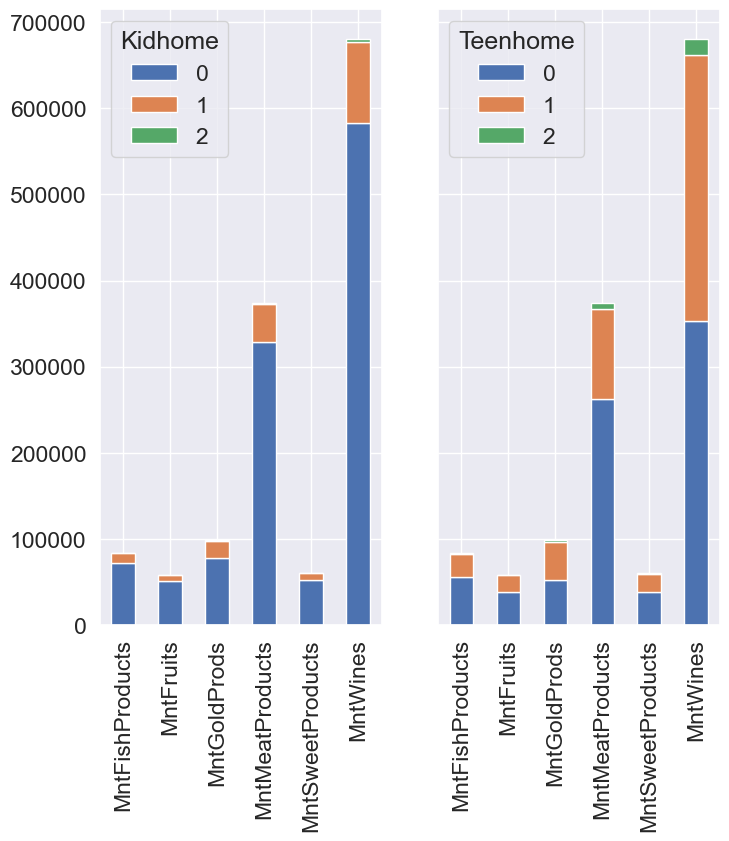

In [93]:
# does number of kids home have anything to do with the kinds of products people buy?

marketing_mnt_kh_pivot=pd.pivot_table(data=marketing_cleaned, values=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], columns='Kidhome', aggfunc=np.sum)
marketing_mnt_th_pivot=pd.pivot_table(data=marketing_cleaned, values=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], columns='Teenhome', aggfunc=np.sum)

fig, ax = plt.subplots(1,2,figsize=(8,8),sharey=True)

marketing_mnt_kh_pivot.plot(kind='bar', stacked=True, ax=ax[0])
marketing_mnt_th_pivot.plot(kind='bar', stacked=True, ax=ax[1])

<AxesSubplot:>

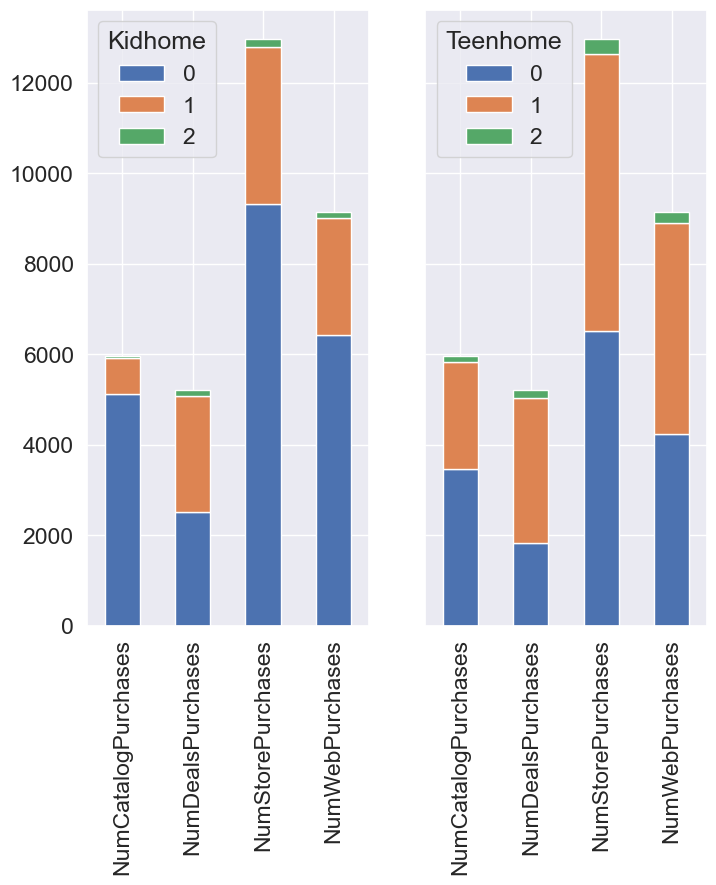

In [94]:
# explore the relationships between # of kids/teens home and sales channels

marketing_num_kh_pivot=pd.pivot_table(data=marketing_cleaned, values=['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases'], columns='Kidhome', aggfunc=np.sum)
marketing_num_th_pivot=pd.pivot_table(data=marketing_cleaned, values=['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases'], columns='Teenhome', aggfunc=np.sum)

fig, ax = plt.subplots(1,2,figsize=(8,8), sharey=True)

marketing_num_kh_pivot.plot(kind='bar', stacked=True, ax=ax[0])
marketing_num_th_pivot.plot(kind='bar', stacked=True, ax=ax[1])

In [ ]:
# explore the relationships between number of kids/teens in the home and campaign successes

marketing_cmp_kh_pivot=pd.pivot_table(data=marketing_cleaned, values=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'], columns='Kidhome', aggfunc=np.sum)
marketing_cmp_th_pivot=pd.pivot_table(data=marketing_cleaned, values=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'], columns='Teenhome', aggfunc=np.sum)

fig, ax = plt.subplots(1,2,figsize=(30,15), sharey=True)

marketing.plot(kind='bar', stacked=True, ax=ax[0])
marketing_cmp_th_pivot.plot(kind='bar', stacked=True, ax=ax[1])

In [ ]:
# explore the relationship between Country and amounts spent on different kinds of products, sales channels and their favourite campaigns

marketing_mnt_cty_pivot=pd.pivot_table(data=marketing_cleaned, values=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], columns='Country', aggfunc=np.sum)
marketing_num_cty_pivot=pd.pivot_table(data=marketing_cleaned, values=['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases'], columns='Country', aggfunc=np.sum)
marketing_cmp_cty_pivot=pd.pivot_table(data=marketing_cleaned, values=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'], columns='Country', aggfunc=np.sum)

fig, ax = plt.subplots(1,3,figsize=(32,15))

marketing_mnt_cty_pivot.plot(kind='bar', stacked=True, ax=ax[0])
marketing_num_cty_pivot.plot(kind='bar', stacked=True, ax=ax[1])
marketing_cmp_cty_pivot.plot(kind='bar', stacked=True, ax=ax[2])

In [ ]:
# explore the relationships between customers' preferred sales channels and amounts spent on wine

fig, ax = plt.subplots(1, 4, figsize=(20,5), sharey=True)

sns.lineplot(data=marketing_cleaned, x='NumDealsPurchases', y='MntWines', ci=None, ax=ax[0])
sns.lineplot(data=marketing_cleaned, x='NumWebPurchases', y='MntWines', ci=None, ax=ax[1])
sns.lineplot(data=marketing_cleaned, x='NumCatalogPurchases', y='MntWines', ci=None, ax=ax[2])
sns.lineplot(data=marketing_cleaned, x='NumStorePurchases', y='MntWines', ci=None, ax=ax[3])

In [ ]:
# explore the relationships between customers' preferred sales channels and amounts spent on meat

fig, ax = plt.subplots(1, 4, figsize=(20,5), sharey=True)

sns.lineplot(data=marketing_cleaned, x='NumDealsPurchases', y='MntMeatProducts', ci=None, ax=ax[0])
sns.lineplot(data=marketing_cleaned, x='NumWebPurchases', y='MntMeatProducts', ci=None, ax=ax[1])
sns.lineplot(data=marketing_cleaned, x='NumCatalogPurchases', y='MntMeatProducts', ci=None, ax=ax[2])
sns.lineplot(data=marketing_cleaned, x='NumStorePurchases', y='MntMeatProducts', ci=None, ax=ax[3])


In [ ]:
# Recency by accepted campaigns - is there one campaign that works well for inactive customers?

cmp1=marketing_cleaned[marketing_cleaned['AcceptedCmp1']==1]
cmp2=marketing_cleaned[marketing_cleaned['AcceptedCmp2']==1]
cmp3=marketing_cleaned[marketing_cleaned['AcceptedCmp3']==1]
cmp4=marketing_cleaned[marketing_cleaned['AcceptedCmp4']==1]
cmp5=marketing_cleaned[marketing_cleaned['AcceptedCmp5']==1]

fig, ax = plt.subplots(5,1,figsize=(3,15),sharex=True)


sns.ecdfplot(data=cmp1, x='Recency', ax=ax[0])
sns.ecdfplot(data=cmp2, x='Recency', ax=ax[1])
sns.ecdfplot(data=cmp3, x='Recency', ax=ax[2])
sns.ecdfplot(data=cmp4, x='Recency', ax=ax[3])
sns.ecdfplot(data=cmp5, x='Recency', ax=ax[4])
ax[0].set(title='Campaign 1')
ax[1].set(title='Campaign 2')
ax[2].set(title='Campaign 3')
ax[3].set(title='Campaign 4')
ax[4].set(title='Campaign 5')

# Multivariate Exploration

In [ ]:
# Income, Education and Marital Status

marketing_edu_ms=df_cleaned[['Education_Cleaned', 'Marital_Status_Cleaned', 'Income']]
marketing_edu_ms_melted=pd.melt(marketing_edu_ms, value_name='Income', value_vars='Income', id_vars=['Education_Cleaned', 'Marital_Status_Cleaned'])

marketing_edu_ms_melted.columns

plt.figure(figsize=(8,12))
sns.boxplot(data=marketing_edu_ms_melted, x='Marital_Status_Cleaned', y='Income', hue='Education_Cleaned')

In [ ]:
# Income, Education and Number of kids/teens

marketing_edu_kh=df_cleaned[['Education_Cleaned', 'Kidhome', 'Income']]
marketing_edu_kh_melted=pd.melt(marketing_edu_kh, value_name='Income', value_vars='Income', id_vars=['Education_Cleaned', 'Kidhome'])
marketing_edu_th=df_cleaned[['Education_Cleaned', 'Teenhome', 'Income']]
marketing_edu_th_melted=pd.melt(marketing_edu_th, value_name='Income', value_vars='Income', id_vars=['Education_Cleaned', 'Teenhome'])


fig, ax = plt.subplots(1,2,figsize=(16,12),sharey=True)
sns.boxplot(data=marketing_edu_kh_melted, x='Kidhome', y='Income', hue='Education_Cleaned', ax=ax[0])
sns.boxplot(data=marketing_edu_th_melted, x='Teenhome', y='Income', hue='Education_Cleaned', ax=ax[1])


# Conclusion 

#### Our Average Customer Profile

 Is a Master's degree holder, Married, in their 40s-70s, earns 35-68k per year and  has 0 -1 child
 
#### Our most popular product types 
Most of our customers spend the most on wine, followed by meat

Most of these customers who spend on meat, do so usually, using the catalogue.

These customers tend not to have kids.

#### What is our most popular sales channel
Our Customers prefer to make their purchases instore, followed by online purchase 

#### What is the performance of our web sales channel?
Even if web is relatively popular as a sales channel, it is alarming that higher website visits don't result in higher web purchases, infact, there seems to be a slightly negative correlation between website visits and website purchases.

This needs to be looked into by the business, there could be something with our website that makes people click on the website, but make no purchases

#### Campaign Performance
Our best performing campaign is campaign 4, while campaign 2 recieved very poor results

Campaign 3 seems to be very attractive to customers with basic education, and it was also common with customers who had 1-2 kids or teens at home.

Lastly, customers with teens(at least one) at home really appreciated campaign 4

#### More Findings
A large portion of our customers are educated with at least a Master's Degree

The Higher education Column seems to be highly correlated with basic education.

Which makes me wonder if we as a business is not affordable for lower income customers

Customers with no kids seem to have higher income, which means that they might fit our targeted profile better. AS a result, it might make sense for us to figure out how to tap into their disposable income (that they have no kids to spend on!) with our campaigns

Finally one thought on recency, I didn't find any correlation between any campaign and recency, But I think potential future campaigns that get inactive customers making purchases could be interesting